<a href="https://colab.research.google.com/github/Merly2004/ProyectoFinal/blob/Proyecto/FinalExamen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# 1. Configuración del Entorno
# Instalación de las bibliotecas necesarias para el análisis de datos, modelado y visualización
!pip install pandas numpy scikit-learn tensorflow keras matplotlib seaborn nltk

In [81]:
# 2. Importación de Bibliotecas
# Importación de las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [82]:
# Descargar recursos de NLTK para el procesamiento de lenguaje natural
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [83]:
# 3. Carga de Datos desde Google Drive
# Montar Google Drive para acceder a los archivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Leer el archivo CSV desde Google Drive
file_path = '/content/drive/MyDrive/kaggle.json/Amazon_bestsellers_items_2025.csv'
data = pd.read_csv(file_path)

In [85]:
# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print("Primeras filas del conjunto de datos:")
print(data.head())

Primeras filas del conjunto de datos:
   Unnamed: 0  rank        asin  \
0           0     1  B073VKKNN9   
1           1     2  B07PQZJ6Y8   
2           2     3  B0D1KL34JM   
3           3     4  B07B9YYLGG   
4           4     5  B073VLGMZ4   

                                       product_title product_price  \
0  Kaspersky | Premium - Total Security (Ultimate...       ₹469.00   
1  K7 Security K7, Total Security, 1 User, 1 Year...       ₹370.00   
2  Microsoft Office 2021 Professional - Lifetime ...     ₹1,799.00   
3  Bitdefender - 1 Device,1 Year - Mobile Securit...        ₹94.00   
4  McAfee Total Protection 2025 | 1 Device, 3 Yea...     ₹1,699.00   

   product_star_rating  product_num_ratings  \
0                  4.3              13324.0   
1                  4.4               2291.0   
2                  4.5                388.0   
3                  4.1               9630.0   
4                  4.4               5783.0   

                           product_url  \
0  ht

In [86]:
# 4. Preprocesamiento de Datos
# Convertir 'product_star_rating' a numérico, manejando errores
data['product_star_rating'] = pd.to_numeric(data['product_star_rating'], errors='coerce')
# Rellenar valores NaN en 'product_star_rating' con la media
data.fillna({'product_star_rating': data['product_star_rating'].mean(), 'rank_change_label': 'Unknown'}, inplace=True)

/tmp/ipython-input-3620856151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data, x='product_star_rating', palette='viridis', alpha=0.8)  # Usar una paleta de colores atractiva


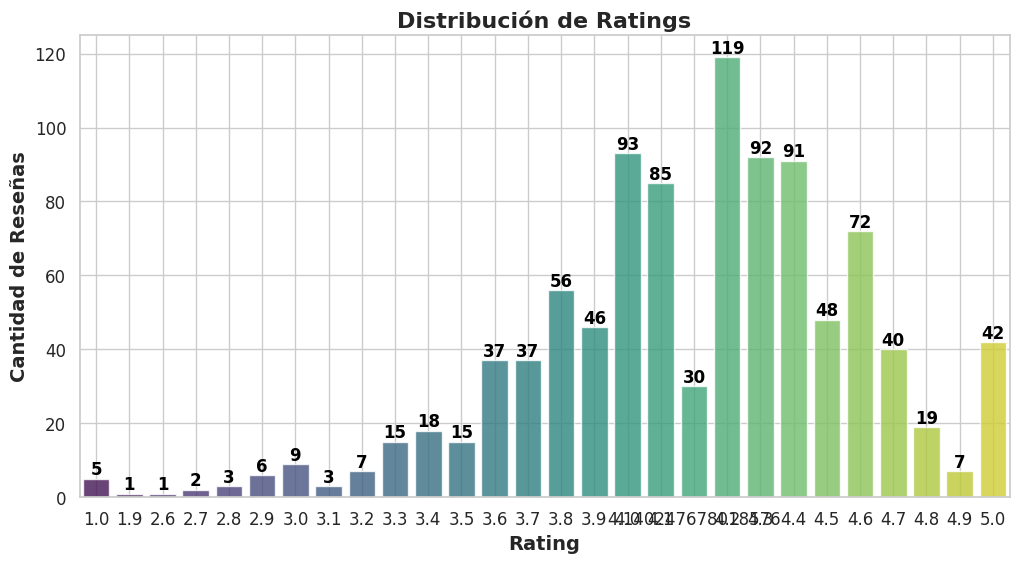

In [104]:
# 5. Análisis Exploratorio de Datos
# Visualización de la distribución de ratings
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Establecer el estilo de Seaborn
# Crear el gráfico de conteo
count_plot = sns.countplot(data=data, x='product_star_rating', palette='viridis', alpha=0.8)  # Usar una paleta de colores atractiva
# Mejorar la presentación del gráfico
plt.title('Distribución de Ratings', fontsize=16, fontweight='bold')  # Título más grande y en negrita
plt.xlabel('Rating', fontsize=14, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Cantidad de Reseñas', fontsize=14, fontweight='bold')  # Etiqueta del eje Y
plt.xticks(fontsize=12)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(True)  # Mostrar cuadrícula
# Agregar etiquetas de conteo sobre las barras
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=12, fontweight='bold', color='black')
plt.savefig('distribution_of_ratings.png')  # Guardar la figura
plt.show()

In [88]:
# 6. Modelado de Machine Learning
# Definir las características (X) y la variable objetivo (y)
X = data['product_title']
y = data['product_star_rating']

# Convertir ratings continuos a categorías discretas
# Definir los bins y etiquetas
bins = [0, 1, 2, 3, 4, 5]
labels = [1, 2, 3, 4, 5]
y_discrete = pd.cut(y, bins=bins, labels=labels, include_lowest=True, right=True)

In [89]:
# Convertir texto a características numéricas
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [90]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_discrete, test_size=0.2, random_state=42)

In [91]:
# Entrenar un modelo de clasificación utilizando Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
# Predicciones
y_pred = model.predict(X_test)

In [93]:
# Evaluación del modelo
print("Evaluación del modelo de Random Forest:")
print(classification_report(y_test, y_pred))

Evaluación del modelo de Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.70      0.57      0.63        70
           5       0.76      0.88      0.82       123

    accuracy                           0.74       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.71      0.74      0.72       200



In [94]:
# 7. Procesamiento de Lenguaje Natural (NLP)
text = "Este es un reporte financiero positivo."
tokens = word_tokenize(text)
print("Tokens de la reseña:", tokens)

Tokens de la reseña: ['Este', 'es', 'un', 'reporte', 'financiero', 'positivo', '.']


In [95]:
# Análisis de sentimiento utilizando VADER
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print("Análisis de sentimiento:", sentiment)

Análisis de sentimiento: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [96]:
# 8. Modelos de Deep Learning
# Definición de la red neuronal
model_dl = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y_discrete.nunique(), activation='softmax')
    # Cambiar la capa de salida para clasificación multiclase
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# Compilación del modelo
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Change loss function for multi-class classification

In [98]:
# Entrenar el modelo
# Codificar la variable objetivo en formato one-hot
y_train_encoded = keras.utils.to_categorical(y_train.cat.codes, num_classes=y_discrete.nunique()) # Use .cat.codes to access numerical codes
model_dl.fit(X_train.toarray(), y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4163 - loss: 1.4836
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6798 - loss: 0.8952
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7654 - loss: 0.6221
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8735 - loss: 0.4704
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8806 - loss: 0.3757
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9067 - loss: 0.2962
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9346 - loss: 0.2304
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9412 - loss: 0.1852
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9556 - loss: 0.1442
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9500 - loss: 0.1468


In [99]:
# Evaluar el modelo
# Codificar la variable objetivo para la evaluación
y_test_encoded = keras.utils.to_categorical(y_test.cat.codes, num_classes=y_discrete.nunique()) # Use .cat.codes to access numerical codes
loss, accuracy = model_dl.evaluate(X_test.toarray(), y_test_encoded)
print(f'Precisión del modelo de Deep Learning: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7512 - loss: 0.6548
Precisión del modelo de Deep Learning: 0.7450000047683716


/tmp/ipython-input-3872180331.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Datos', loc='upper left', fontsize=12)  # Leyenda


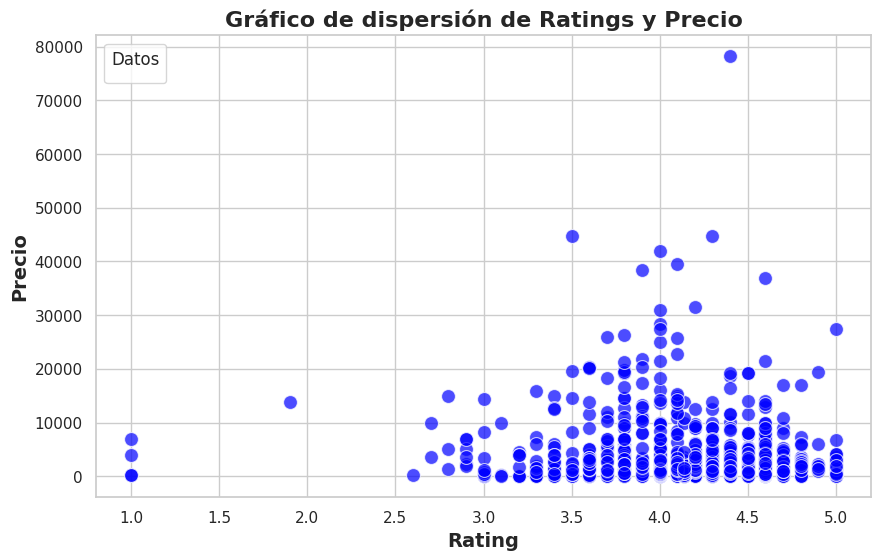

In [102]:
# 9. Visualización de Resultados
# Convertir product_price a numérico, manejando errores
data['product_price_numeric'] = data['product_price'].replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float) # Elimina todos los caracteres no numéricos excepto el punto decimal y reemplaza las cadenas vacías con NaN

# Gráfico de dispersión de Ratings y Precio
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Establecer el estilo de Seaborn
scatter_plot = sns.scatterplot(data=data, x='product_star_rating', y='product_price_numeric',
                                color='blue', s=100, alpha=0.7)  # Cambiar color y tamaño de los puntos
plt.title('Gráfico de dispersión de Ratings y Precio', fontsize=16, fontweight='bold')  # Título más grande y en negrita
plt.xlabel('Rating', fontsize=14, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Precio', fontsize=14, fontweight='bold')  # Etiqueta del eje Y
plt.legend(title='Datos', loc='upper left', fontsize=12)  # Leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.show()

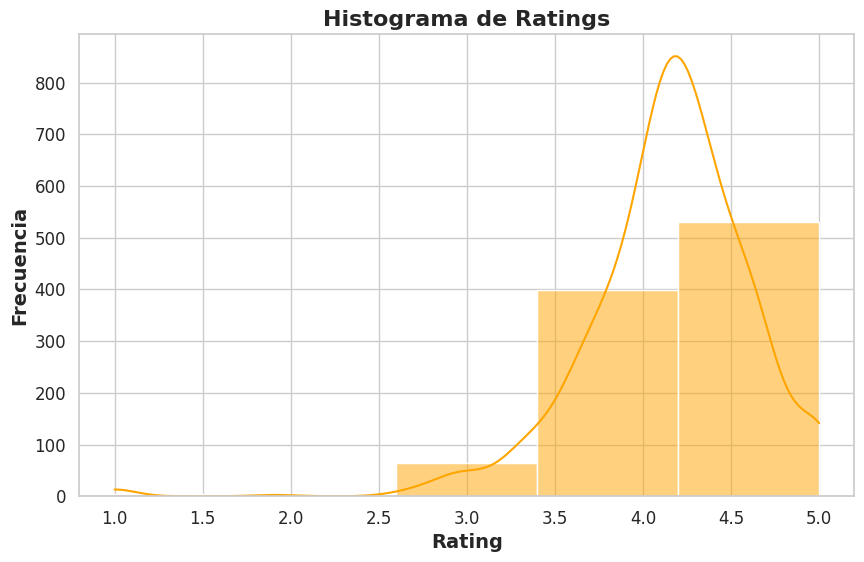

In [103]:
# Histograma de Ratings
plt.figure(figsize=(10, 6))
histogram = sns.histplot(data['product_star_rating'], bins=5, color='orange', kde=True)  # Agregar KDE para suavizar
plt.title('Histograma de Ratings', fontsize=16, fontweight='bold')  # Título más grande y en negrita
plt.xlabel('Rating', fontsize=14, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')  # Etiqueta del eje Y
plt.xticks(fontsize=12)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(True)  # Mostrar cuadrícula
plt.show()